# Exercise 1

## Import packages

In [3]:
import skimage.io
import skimage.color
import skimage.exposure
import numpy as np
import matplotlib.pyplot as plt

## Task 1
(2 points)

Implementation of some basic vector and matrix calculations using NumPy.

Reference: https://numpy.org/doc/1.18/reference/index.html

Create the following vectors and matrix using numpy. They should use floating point as data type.
$$
a = \begin{bmatrix}
1 & 0 & 1 & 0 & 1
\end{bmatrix}
$$

$$
b = \begin{bmatrix}
1 & 2 & 3 & 4 & 5
\end{bmatrix}
$$

$$
M =\begin{bmatrix}
1 & 2 & 3\\
4 & 5 & 6\\
7 & 8 & 9\\
\end{bmatrix}
$$

Also define the following scalar value
$$k = 5.0$$

In [4]:
# Create vectors, matrix and scalar value
a = np.array([1, 0, 1, 0, 1], dtype=np.float)
b = np.array([1, 2, 3, 4, 5], dtype=np.float)
M = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]],
             dtype=np.float)
k = 5.0

print(f'a = {a}')
print(f'b = {b}')
print(f'M = {M}')
print(f'k = {k}')

a = [1. 0. 1. 0. 1.]
b = [1. 2. 3. 4. 5.]
M = [[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]
k = 5.0


In [5]:
# Add vector a with vector b
add = a+b
np.testing.assert_allclose(add, np.array([2, 2, 4, 4, 6]))
print(f'a + b = {add}')

# Multiply vector a with scalar value k
mult = k*a
np.testing.assert_allclose(mult, np.array([5, 0, 5, 0, 5]))
print(f'k * a = {mult}')

# Dot product between a and b
dot = a@b
np.testing.assert_allclose(dot, 9.0)
print(f'<a, b> = {dot}')

# Create vector c by sclicing vector a in order to get [0, 1, 0]
c = a[1:-1]
np.testing.assert_allclose(c, [0, 1, 0])
print(f'c = {c}')

# Multiply vector c with matrix M
cM_mult = c*M
np.testing.assert_allclose(cM_mult, [[0, 2, 0], [0, 5, 0], [0, 8, 0]])
print(f'c * M = {cM_mult}')

# Dot product between vector and matrix M
cM_dot = np.matmul(c,M)
np.testing.assert_allclose(cM_dot, [4, 5, 6])
print(f'<c, M> = {cM_dot}')

# Use a numpy-herlper function to create a vector d = [0, 1, 2 ..., 99]
d = np.arange(100)

# Now use slicing with strides to reduce this vector to d_small = [40, 50, 60]
d_small = d[40:61:10]
np.testing.assert_allclose(d_small, [40, 50, 60])

print(f'd_small = {d_small}')

a + b = [2. 2. 4. 4. 6.]
k * a = [5. 0. 5. 0. 5.]
<a, b> = 9.0
c = [0. 1. 0.]
c * M = [[0. 2. 0.]
 [0. 5. 0.]
 [0. 8. 0.]]
<c, M> = [4. 5. 6.]
d_small = [40 50 60]


## Task 2
(1 point)

Load an image from your disk, convert it to gray scale and save it.
Therefore, use the scikit-image modules skimage.io and skimage.color.

Reference: https://scikit-image.org/docs/dev/api/api.html

In [164]:
# Load the image ./data/pepo.jpg
image_pepo = skimage.io.imread("./data/pepo.jpg")

# Convert the image to grayscale
image_pepo_gray = skimage.color.rgb2gray(image_pepo)

# Save the grayscale image to ./data/pepo_gray.jpg
skimage.io.imsave("./data/pepo_gray.jpg", image_pepo_gray)

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


## Task 3
(3 points)

Plot the RGB and the grayscale image using Matplotlib. Additionally, plot the color histogram of the rgb image.

Reference: https://matplotlib.org/users/index.html

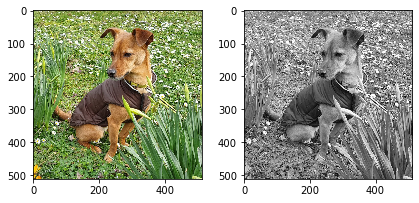

In [175]:
# Use Matplotlib to show the RGB and the grayscale image side by side.
# Make sure that the gray image is displayed in gray.
plt.figure()
plt.subplot(121)
skimage.io.imshow(image_pepo)
plt.subplot(122)
skimage.io.imshow(image_pepo_gray)
plt.show()

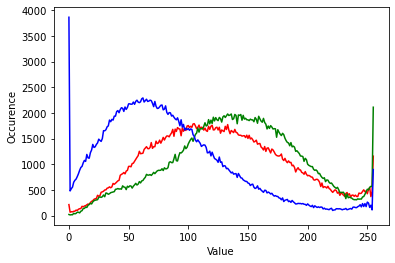

In [176]:
def plot_color_histogram(image):
    '''
    Plot the histogram of each color channel into a single plot.
    Take a look at the scikit-image submodule skimage.exposure

    image -- RGB image
    '''
    # implement this function
    colors = ['r', 'g', 'b']
    plt.figure()
    for i in range(3):
        (hist, bin_center) = skimage.exposure.histogram(image[:,:,i])
        plt.plot(hist, colors[i])
    plt.xlabel('Value')
    plt.ylabel('Occurence')
    plt.show()
    pass
    
plot_color_histogram(image_pepo)

## Task 4
(4 points)

Convert the RGB image into the HSV color space. Rotate the colors in the HSV color space, convert it back to the RGB color space and plot it together with its histogram. For this task, you are only allowed to use NumPy.

More information about the HSV color space: https://en.wikipedia.org/wiki/HSL_and_HSV

In [194]:
def rgb2hsv(image):
    '''
    Convert the rgb image into hsv color space and return it.

    image -- rgb image
    '''
    image = image.astype(int)
    R = image[:,:,0]
    G = image[:,:,1]
    B = image[:,:,2]
    Xmax = np.amax(image, axis=2)
    Xmin = np.amin(image, axis=2)
    V = Xmax
    C = Xmax - Xmin
    L = 0.5*(Xmax + Xmin)
    
    H = R
    S = R
    
    old_settings = np.seterr(all='ignore')
    H[C==0] = 0
    cond = np.logical_and(V==B, C!=0)
    H = np.where(cond, 60*(4 + (R-G)/C), H)
    cond = np.logical_and(V==G, C!=0)
    H = np.where(cond, 60*(2 + (B-R)/C), H)
    cond = np.logical_and(V==R, C!=0)                  
    H = np.where(cond, 60*(0 + (G-B)/C), H)
    H = np.where(H < 0, 360 + H, H)
    S[V==0] = 0
    S = np.where(V!=0, np.divide(C,V), S)
    old_settings = np.seterr(all='ignore')
    
    hsv_image = image.astype(float)
    hsv_image[:,:,0] = H/360
    hsv_image[:,:,1] = S
    hsv_image[:,:,2] = V/255
    return hsv_image

def hsv2rgb(image):
    '''
    Convert the hsv image into rgb color space and return it.

    image -- hsv image
    '''
    image = image.astype(float)
    H = image[:,:,0]*360
    S = image[:,:,1]
    V = image[:,:,2]*255
    
    R1 = np.zeros_like(H)
    G1 = np.zeros_like(H)
    B1 = np.zeros_like(H)
    
    RGB1 = np.stack([R1,G1,B1], axis=2)
    
    C = V*S
    
    H_prime = H/60
    
    X = C * (np.ones_like(H) - abs(H_prime%2 - np.ones_like(H)))
    
    cond = np.logical_and(H_prime>=0, H_prime<=1) 
    RGB1 = np.where(np.stack([cond, cond, cond], axis=2), np.stack([C,X,np.zeros_like(C)], axis=2), RGB1)
    cond = np.logical_and(H_prime>1, H_prime<=2) 
    RGB1 = np.where(np.stack([cond, cond, cond], axis=2), np.stack([X,C,np.zeros_like(C)], axis=2), RGB1)
    cond = np.logical_and(H_prime>2, H_prime<=3) 
    RGB1 = np.where(np.stack([cond, cond, cond], axis=2), np.stack([np.zeros_like(C),C,X], axis=2), RGB1)
    cond = np.logical_and(H_prime>3, H_prime<=4) 
    RGB1 = np.where(np.stack([cond, cond, cond], axis=2), np.stack([np.zeros_like(C),X,C], axis=2), RGB1)
    cond = np.logical_and(H_prime>4, H_prime<=5) 
    RGB1 = np.where(np.stack([cond, cond, cond], axis=2), np.stack([X,np.zeros_like(C),C], axis=2), RGB1)
    cond = np.logical_and(H_prime>5, H_prime<=6) 
    RGB1 = np.where(np.stack([cond, cond, cond], axis=2), np.stack([C,np.zeros_like(C),X], axis=2), RGB1)
    
    M = V - C
    
    RGB = RGB1 + np.stack([M,M,M], axis=2)
    RGB = RGB
    
    return RGB.astype(np.uint8)

def rotateHue(image, angle):
    '''
    rotate colors in hsv color space.

    image -- hsv image
    angle -- degrees
    '''
    H = image[:,:,0]*360
    H_new = (H + angle)%360
    new_image = image.copy()
    new_image[:,:,0] = H_new/360
    return new_image

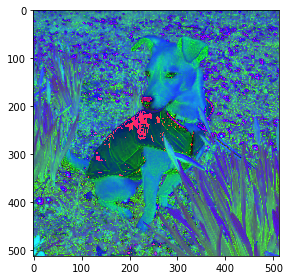

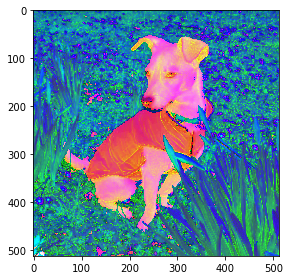

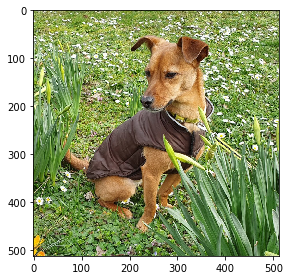

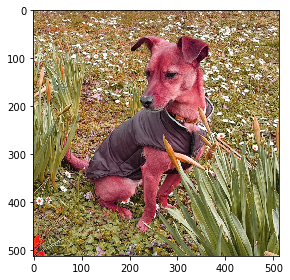

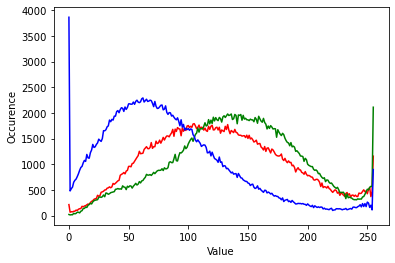

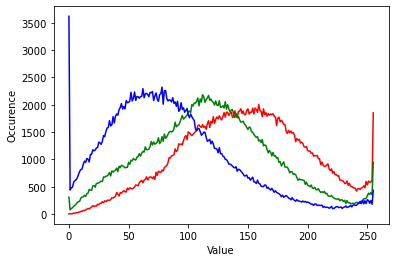

In [208]:
plt.figure()
# Change the color space from rgb to hsv and plot it
image_hsv = rgb2hsv(image_pepo)

# plot image
skimage.io.imshow(image_hsv)
plt.show()

# Rotate the colors in hsv color space
image_rot = rotateHue(image_hsv, 320)
skimage.io.imshow(image_rot)
plt.show()

# Now, convert it back from HSV to RGB and plot it
image_back = hsv2rgb(image_hsv)
skimage.io.imshow(image_back)
plt.show()

image_rot_back = hsv2rgb(image_rot)
skimage.io.imshow(image_rot_back)
plt.show()

# TODO: Plot the color histogram of the inverted rgb image
plot_color_histogram(image_pepo)
plot_color_histogram(image_rot_back)